In [163]:
""" You are provided with a realistic dataset containing over 30,000 job postings in the field of data analysis, data science, and machine learning.
This dataset is located in the `Job_Data.csv` file and includes the following columns:
- `job_title_short`: Short version of the job title
- `job_location`: City and state
- `job_schedule_type`: Full-time / Part-time
- `job_work_from_home`: Remote work possible? (True/False)
- `salary_rate`: “year” or “hour” – salary specification per year or per hour
- `salary_year_avg`: Average annual salary (if provided)
- `job_no_degree_mention`: Is a degree required? (True/False)
- `job_skills`: List of required skills (e.g., Python, SQL, TensorFlow)
- `company_name`: Employer
- `job_posted_date`: When the job was posted

Use Python, Pandas, and Matplotlib to analyze this dataset and conduct an **Exploratory Data Analysis (EDA)**. The goal is to discover interesting relationships, patterns, and anomalies—and clearly present them in a short presentation and report.

## Guidelines

### Objective

Explore tech job postings across different countries to find out:
- Which skills are in demand
- Which roles are best paid
- How work models differ
- How salaries are distributed regionally
- And much more!

### Data Preparation (Pandas)

**Task 1: Initial Data Checks:**
- Display the first 10 rows
- Inspect data types
- Check for missing values
- Review unique values in `job_country`, `job_title_short`, `salary_rate`

**Task 2: Clean Data Types**
- Convert `job_posted_date` to datetime
- from `salary_hour_avg` & convert to float
- Convert `salary_year_avg` to float"""

import pandas as pd
import matplotlib.pyplot as plt  

df = pd.read_csv("Job_Data.csv", delimiter=';')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("First 10 Rows:")
print(df.head(10))

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique job_country:", df['job_country'].unique())
print("Unique job_title_short:", df['job_title_short'].unique())
print("Unique salary_rate:", df['salary_rate'].unique())

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['salary_hour_avg'] = df['salary_hour_avg'].str.replace(',', '.', regex=False)
df['salary_hour_avg'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce')
df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')

df = df.dropna(subset=['salary_year_avg', 'salary_hour_avg'], how='all')

df['job_location'].fillna('Unknown', inplace=True)
df['job_schedule_type'].fillna('Unknown', inplace=True)
df['job_via'].fillna('Unknown', inplace=True)
df['job_skills'].fillna('[]', inplace=True)

df.loc[
    (df['job_via'].isnull()) &
    (df['company_name'] == 'Jobs Near Me'),
    'job_via'
] = 'Jobs Near Me'

print("\nCleaned Data Types:")
print(df[['job_posted_date', 'salary_year_avg', 'salary_hour_avg']].dtypes)

print("\nRemaining Missing Values After Cleaning:")
print(df.isnull().sum())


First 10 Rows:
             job_title_short  \
0      Senior Data Scientist   
1              Data Engineer   
2        Senior Data Analyst   
3  Machine Learning Engineer   
4             Data Scientist   
5              Data Engineer   
6              Data Engineer   
7       Senior Data Engineer   
8        Senior Data Analyst   
9             Data Scientist   

                                           job_title       job_location  \
0  Senior Data Scientist Data and Analytics Perfo...     Bennington, NE   
1                                 Data Engineer - MA           Mesa, AZ   
2  Supervisory Information Technology Specialist ...     Alexandria, VA   
3                Machine Learning Research Scientist     Pittsburgh, PA   
4                                Data Scientist, AWS         Irving, TX   
5                                      Data Engineer         Tysons, VA   
6                         Sr. Data Engineer (remote)           Anywhere   
7  Senior Data Engineer - Cloud 

C:\Users\keith\AppData\Local\Temp\ipykernel_12520\2327547500.py:67: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\keith\AppData\Local\Temp\ipykernel_12520\2327547500.py:68: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [164]:
"""**Task 3: Create New Features**
- Create a feature: `is_remote` from `job_work_from_home`
- Create a feature: `salary_bin` (e.g., low/mid/high based on `salary_year_avg`)
- Extract year & month from `job_posted_date`"""

import pandas as pd

df['salary_hour_to_year'] = df['salary_hour_avg'] * 2080

df['effective_salary'] = df['salary_year_avg'].fillna(df['salary_hour_to_year'])
df['effective_salary'] = df['effective_salary'].round(2)

df['job_posted_year'] = df['job_posted_date'].dt.year
df['job_posted_month'] = df['job_posted_date'].dt.month
df['job_posted_dayofweek'] = df['job_posted_date'].dt.day_name()

df['is_remote'] = df['job_work_from_home'].astype(bool)

def salary_bin(salary):
    if pd.isna(salary):
        return 'Unknown'
    elif salary < 80000:
        return 'Low'
    elif salary <= 150000:
        return 'Mid'
    else:
        return 'High'

df['salary_bin'] = df['effective_salary'].apply(salary_bin)

print("\nNew Feature Columns:")
print(df[['effective_salary', 'salary_bin', 'job_posted_year', 'job_posted_month', 'job_posted_dayofweek', 'is_remote']].head())

display(df[['effective_salary', 'salary_bin', 'job_posted_year', 'job_posted_month', 'job_posted_dayofweek', 'is_remote']].head(10))


New Feature Columns:
   effective_salary salary_bin  job_posted_year  job_posted_month  \
0          128050.0        Mid             2023                 4   
1          140000.0        Mid             2023                 3   
2          156000.0       High             2023                 7   
3          140000.0        Mid             2023                 4   
4           82773.6        Mid             2023                10   

  job_posted_dayofweek  is_remote  
0               Monday      False  
1               Monday      False  
2            Wednesday      False  
3             Thursday      False  
4               Sunday      False  


,effective_salary,salary_bin,job_posted_year,job_posted_month,job_posted_dayofweek,is_remote
0,128050.00,Mid,2023,4,Monday,False
1,140000.00,Mid,2023,3,Monday,False
2,156000.00,High,2023,7,Wednesday,False
3,140000.00,Mid,2023,4,Thursday,False
4,82773.60,Mid,2023,10,Sunday,False
5,127212.79,Mid,2023,10,Tuesday,False
6,135000.00,Mid,2023,10,Thursday,True
7,120000.00,Mid,2023,9,Friday,False
8,170000.00,High,2023,9,Thursday,True
9,224500.00,High,2023,1,Monday,False


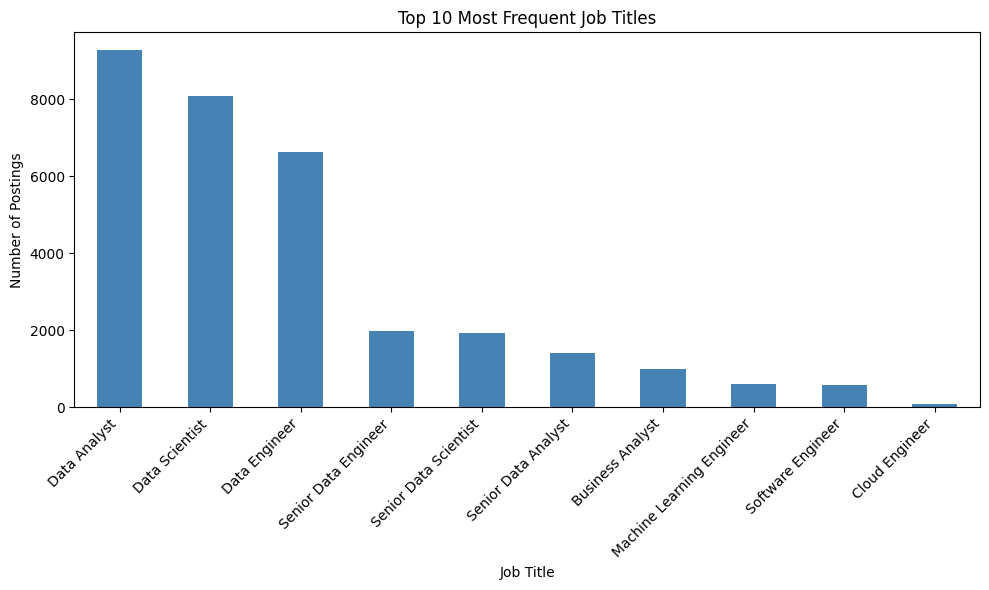

In [ ]:
""" Analyses

**Task 4: Clear Visualizations**
- Top 10 most frequent job titles
- Top 10 most in-demand skills *(Hint: split `job_skills` as a list)*
- Salary by job title (bar plot)
- Number of remote jobs by year/month
- Salary by country or U.S. state """

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['job_title_short'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  
plt.tight_layout()
plt.show()




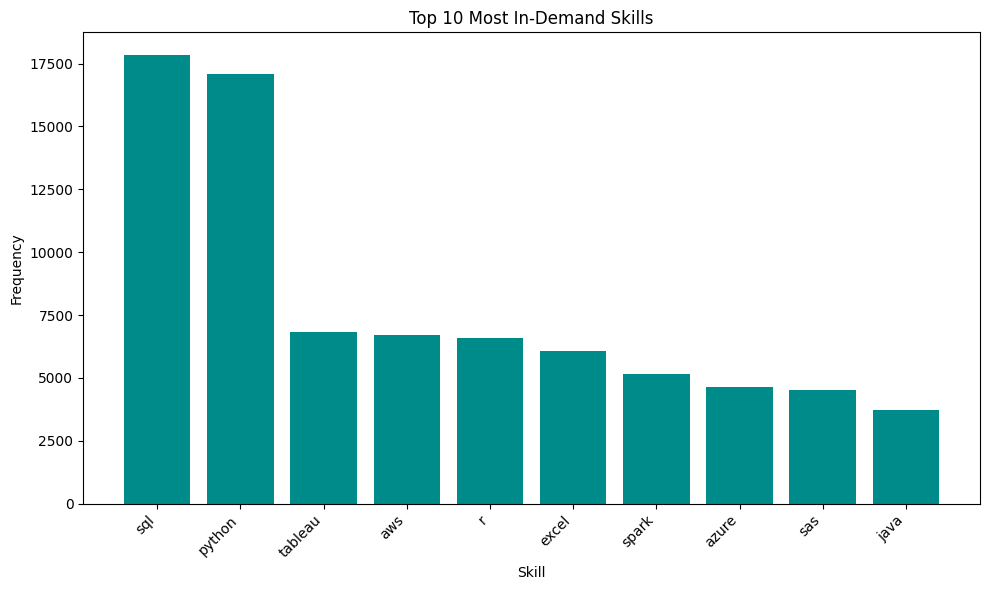

In [166]:
import ast
from collections import Counter

df['job_skills_list'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

all_skills = [skill.strip().lower() for sublist in df['job_skills_list'] for skill in sublist]

top_skills = Counter(all_skills).most_common(10)
skills, counts = zip(*top_skills)

plt.figure(figsize=(10, 6))
plt.bar(skills, counts, color='darkcyan')
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()


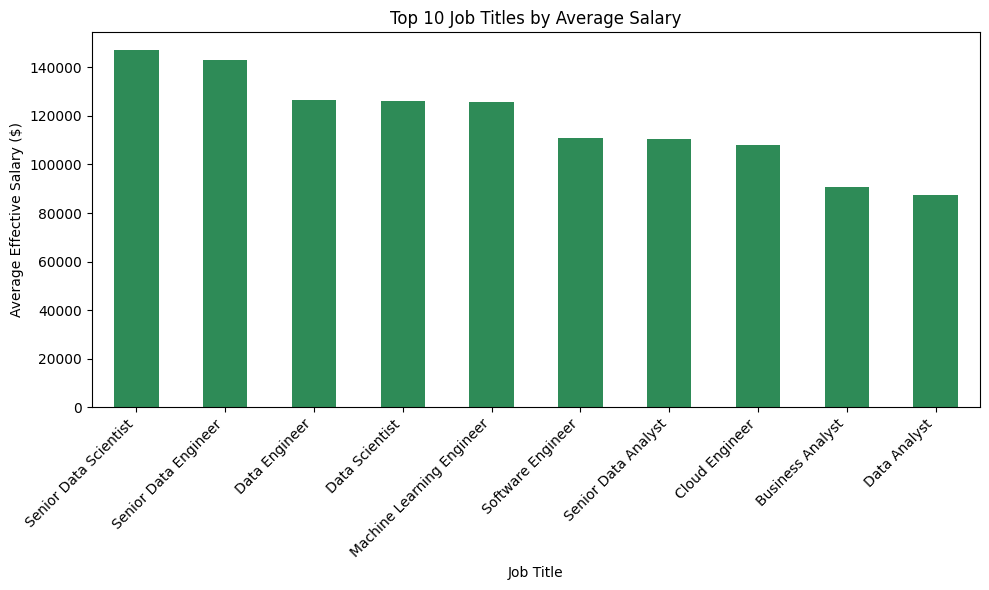

In [ ]:
avg_salary_by_title = (
    df.groupby('job_title_short')['effective_salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
avg_salary_by_title.plot(kind='bar', color='seagreen')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Effective Salary ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()
plt.show()


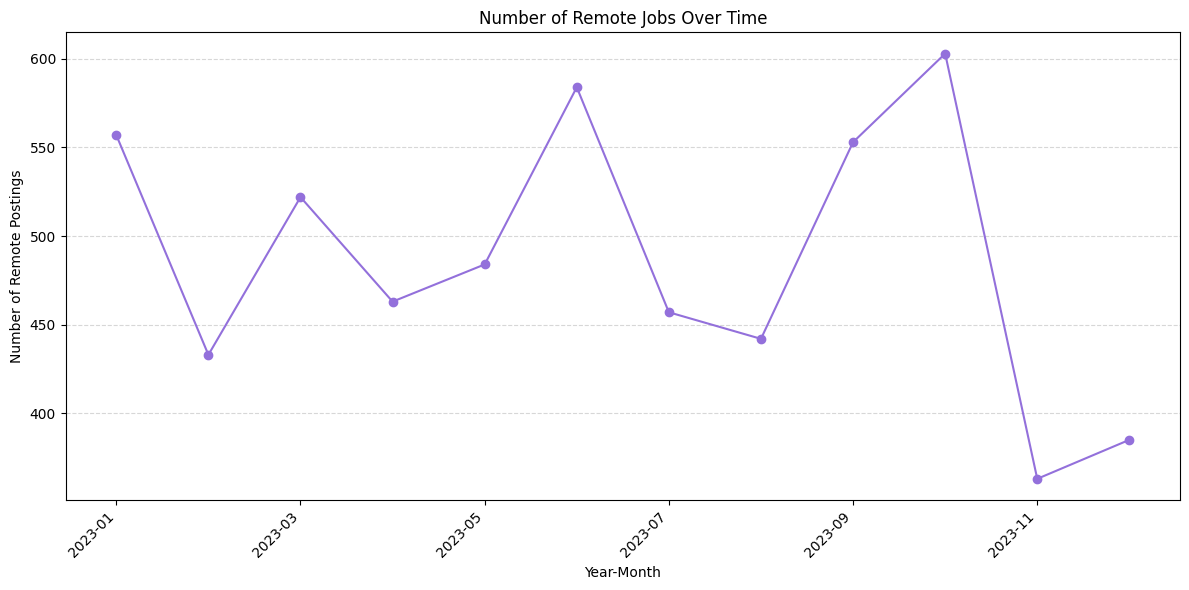

In [ ]:
remote_jobs = df[df['is_remote'] == True].copy()

remote_jobs['year_month'] = remote_jobs['job_posted_date'].dt.to_period('M').astype(str)

remote_count_by_month = remote_jobs.groupby('year_month').size()

plt.figure(figsize=(12, 6))
remote_count_by_month.plot(kind='line', marker='o', color='mediumpurple')
plt.title('Number of Remote Jobs Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Remote Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


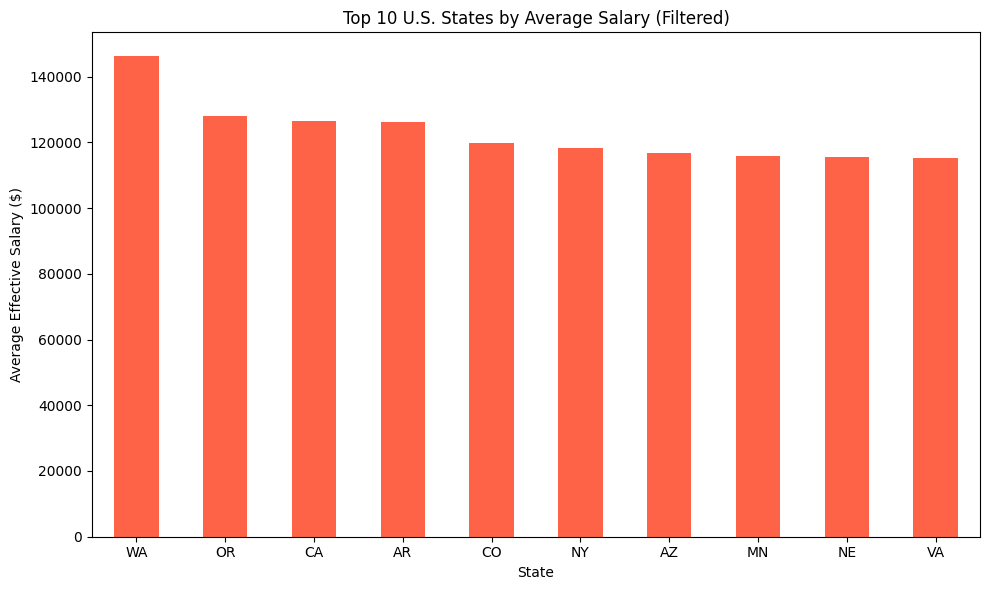

In [169]:
import matplotlib.pyplot as plt
import re

df_safe = df.copy()
df_safe['job_skills_list'] = df_safe['job_skills_list'].astype(str)

df_cleaned = df_safe.drop_duplicates()

us_jobs = df_cleaned[df_cleaned['job_country'] == 'United States'].copy()

us_jobs = us_jobs[us_jobs['effective_salary'] < 250000]

us_jobs['state'] = us_jobs['job_location'].str.extract(r',\s*([A-Z]{2})(?:\s|$)')

state_counts = us_jobs['state'].value_counts()

valid_states = state_counts[state_counts >= 25].index
us_jobs = us_jobs[us_jobs['state'].isin(valid_states)]

avg_salary_by_state = (
    us_jobs.groupby('state')['effective_salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
avg_salary_by_state.plot(kind='bar', color='tomato')
plt.title('Top 10 U.S. States by Average Salary (Filtered)')
plt.xlabel('State')
plt.ylabel('Average Effective Salary ($)')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()



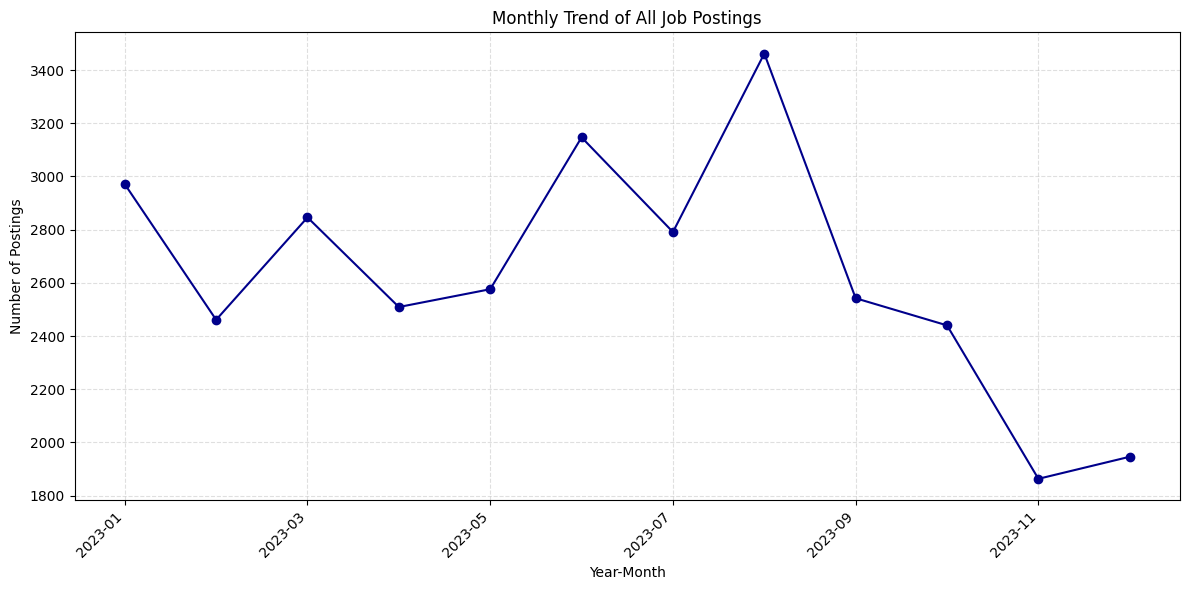

In [170]:
"""**Task 5: Time Series Analysis**
- How has the number of job postings changed over time?
- Are there seasonal trends?"""

import matplotlib.pyplot as plt

df['year_month'] = df['job_posted_date'].dt.to_period('M').astype(str)

monthly_postings = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_postings.plot(kind='line', marker='o', color='darkblue')
plt.title('Monthly Trend of All Job Postings')
plt.xlabel('Year-Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



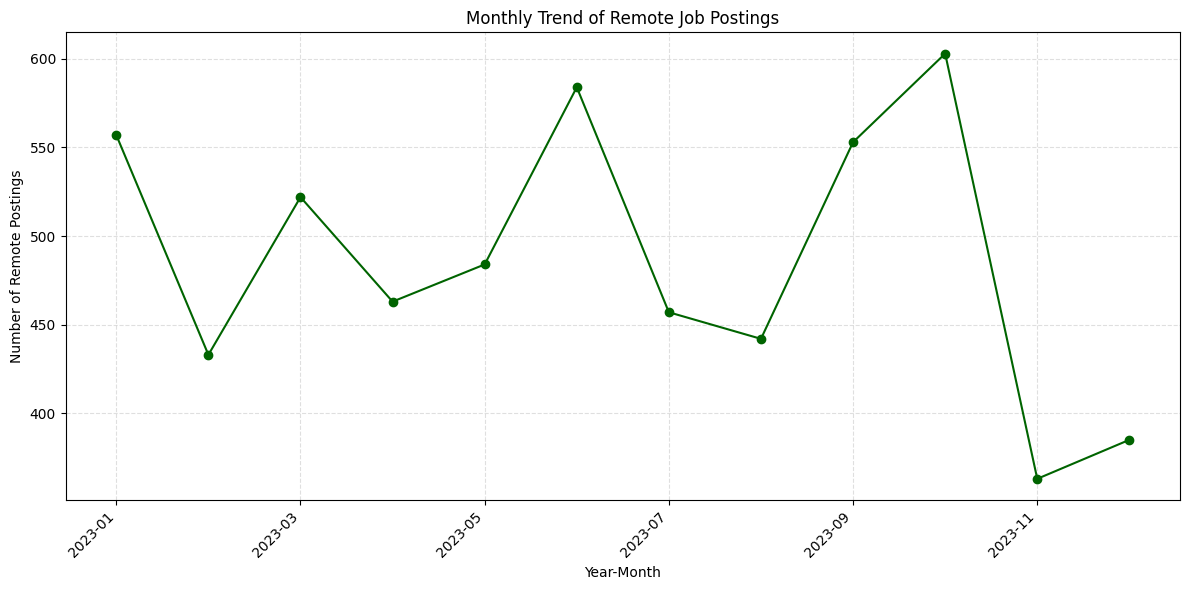

In [171]:

remote_df = df[df['is_remote'] == True]

remote_monthly = remote_df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
remote_monthly.plot(kind='line', marker='o', color='darkgreen')
plt.title('Monthly Trend of Remote Job Postings')
plt.xlabel('Year-Month')
plt.ylabel('Number of Remote Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


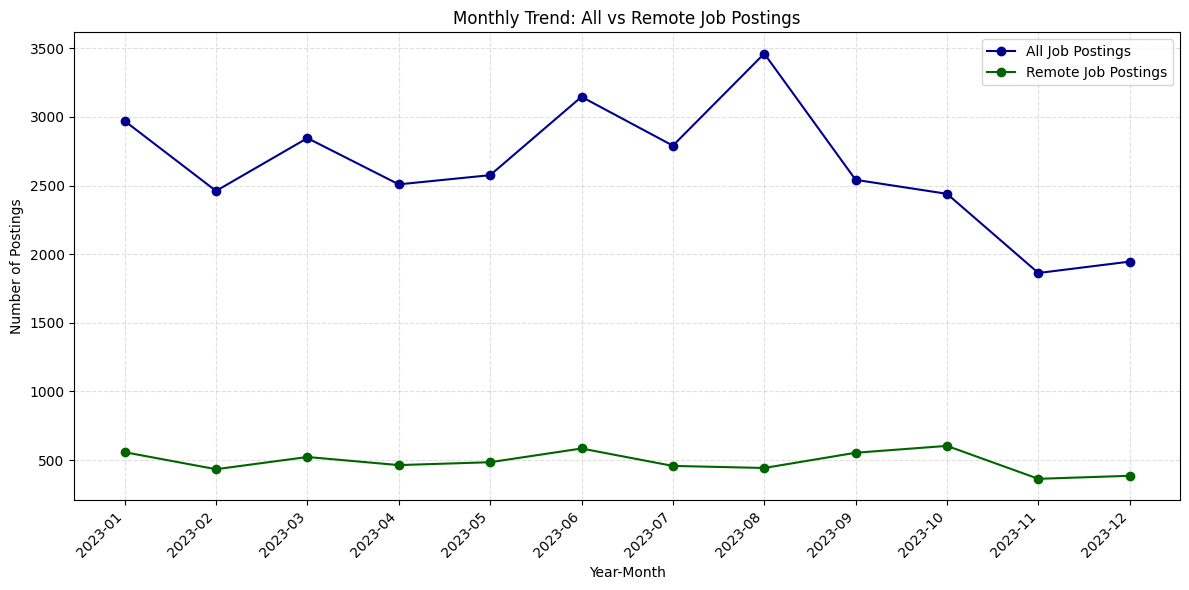

In [172]:
import matplotlib.pyplot as plt

df['year_month'] = df['job_posted_date'].dt.to_period('M').astype(str)

monthly_postings = df['year_month'].value_counts().sort_index()

remote_postings = df[df['is_remote'] == True]['year_month'].value_counts().sort_index()

combined_df = pd.DataFrame({
    'All Postings': monthly_postings,
    'Remote Postings': remote_postings
}).fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['All Postings'], label='All Job Postings', marker='o', color='darkblue')
plt.plot(combined_df.index, combined_df['Remote Postings'], label='Remote Job Postings', marker='o', color='darkgreen')

plt.title('Monthly Trend: All vs Remote Job Postings')
plt.xlabel('Year-Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


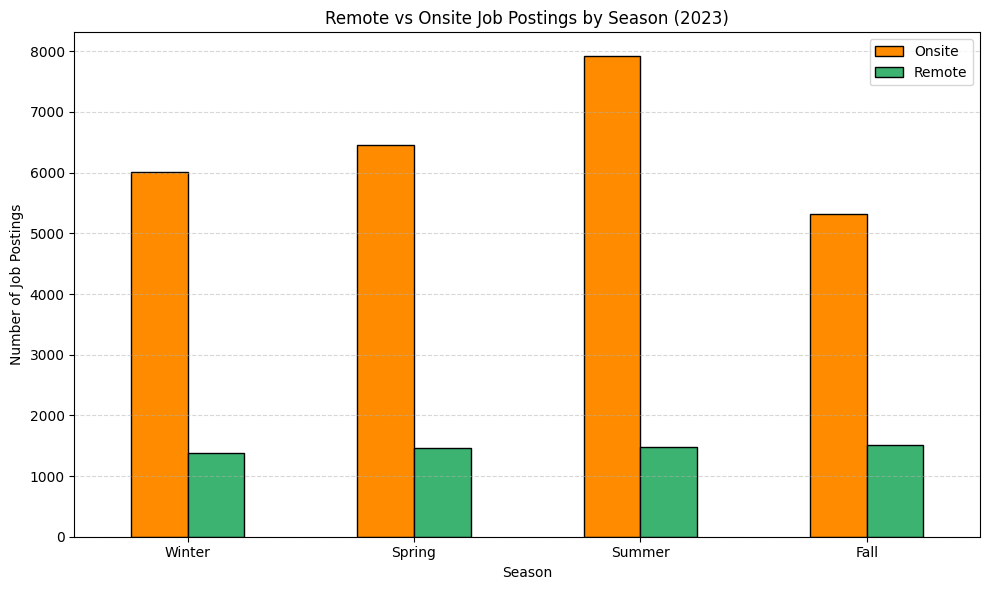

In [173]:
import matplotlib.pyplot as plt

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['month'] = df['job_posted_date'].dt.month

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(month_to_season)

season_remote_counts = (
    df.groupby(['season', 'is_remote'])
    .size()
    .unstack(fill_value=0)
    .reindex(['Winter', 'Spring', 'Summer', 'Fall'])
)

ax = season_remote_counts.plot(
    kind='bar',
    figsize=(10, 6),
    color=['darkorange', 'mediumseagreen'],
    edgecolor='black'
)

plt.title('Remote vs Onsite Job Postings by Season (2023)')
plt.xlabel('Season')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.legend(['Onsite', 'Remote'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



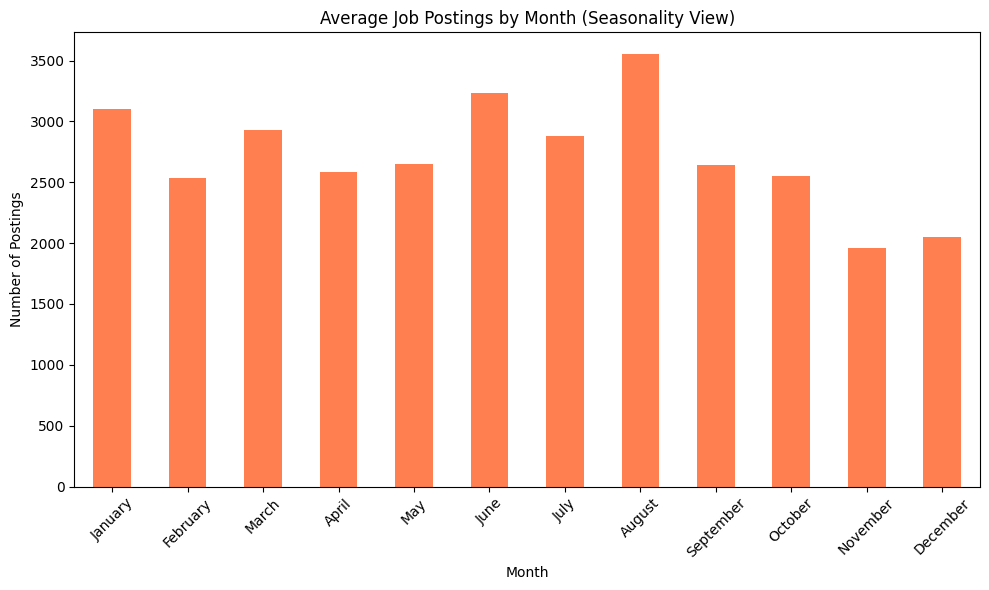

In [174]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Job_Data.csv", encoding="latin1", sep=";")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')

german_to_english = {
    'Januar': 'January', 'Februar': 'February', 'März': 'March', 'April': 'April',
    'Mai': 'May', 'Juni': 'June', 'Juli': 'July', 'August': 'August',
    'September': 'September', 'Oktober': 'October', 'November': 'November', 'Dezember': 'December'
}

df['month_name'] = df['job_posted_date'].dt.strftime('%B')
df['month_name'] = df['month_name'].map(german_to_english).fillna(df['month_name'])

monthly_seasonality = df.groupby('month_name').size()
monthly_seasonality = monthly_seasonality.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 6))
monthly_seasonality.plot(kind='bar', color='coral')
plt.title('Average Job Postings by Month (Seasonality View)')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


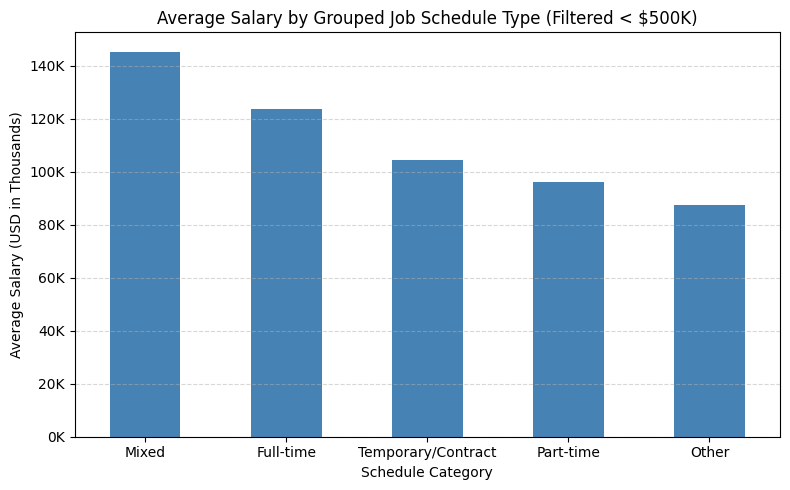

In [175]:

"""**Task 6: Full-time vs. Part-time Comparison**
- Average salary
- Remote job share
- Top skills"""

def map_schedule_type(raw):
    if pd.isna(raw):
        return 'Other'
    raw = raw.lower()
    if 'full-time' in raw and 'part-time' in raw:
        return 'Mixed'
    elif 'full-time' in raw:
        return 'Full-time'
    elif 'part-time' in raw:
        return 'Part-time'
    elif 'contract' in raw or 'temporary' in raw:
        return 'Temporary/Contract'
    else:
        return 'Other'

df['schedule_group'] = df['job_schedule_type'].apply(map_schedule_type)

df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')

filtered_df = df[(df['salary_year_avg'].notna()) & (df['salary_year_avg'] < 500_000)]

avg_salary_by_group = (
    filtered_df.groupby('schedule_group')['salary_year_avg']
    .mean()
    .sort_values(ascending=False)
)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 5))
avg_salary_by_group.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Average Salary by Grouped Job Schedule Type (Filtered < $500K)')
ax.set_xlabel('Schedule Category')
ax.set_ylabel('Average Salary (USD in Thousands)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




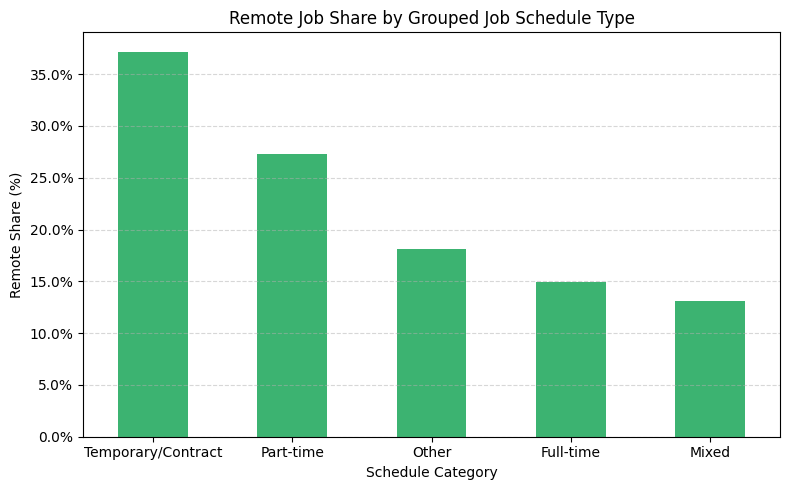

In [ ]:
df['is_remote'] = df['job_work_from_home'].astype(float)

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['is_remote'] = df['job_work_from_home'].astype(float)

remote_df = df[df['is_remote'].notna() & df['schedule_group'].notna()]

remote_share_by_group = (
    remote_df.groupby('schedule_group')['is_remote']
    .mean()
    .sort_values(ascending=False)
)

fig, ax = plt.subplots(figsize=(8, 5))
remote_share_by_group.plot(kind='bar', color='mediumseagreen', ax=ax)

ax.set_title('Remote Job Share by Grouped Job Schedule Type')
ax.set_xlabel('Schedule Category')
ax.set_ylabel('Remote Share (%)')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


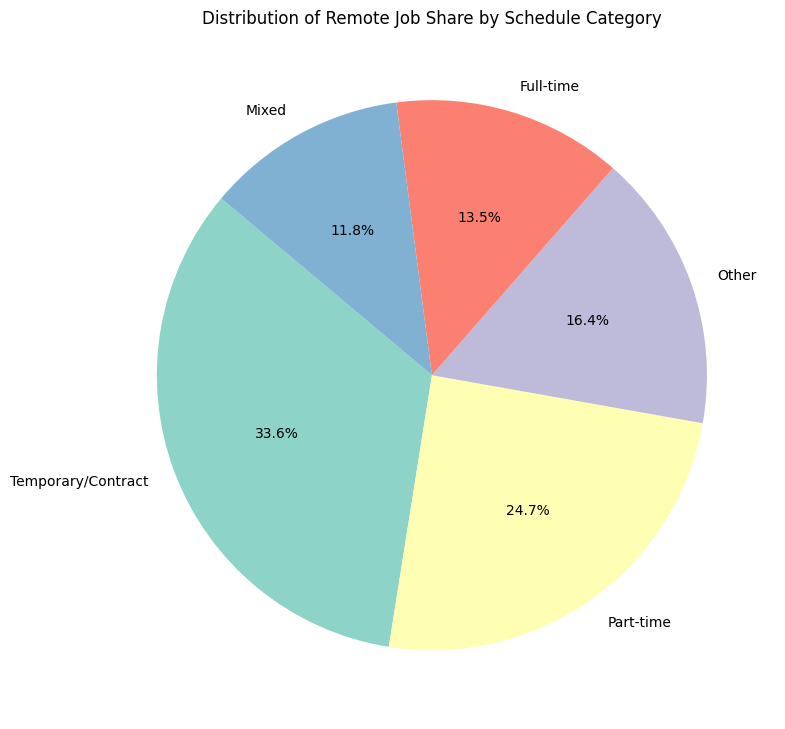

In [177]:
import matplotlib.pyplot as plt

normalized_shares = remote_share_by_group / remote_share_by_group.sum()

plt.figure(figsize=(8, 8))
plt.pie(
    normalized_shares,
    labels=normalized_shares.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title('Distribution of Remote Job Share by Schedule Category')
plt.tight_layout()
plt.show()


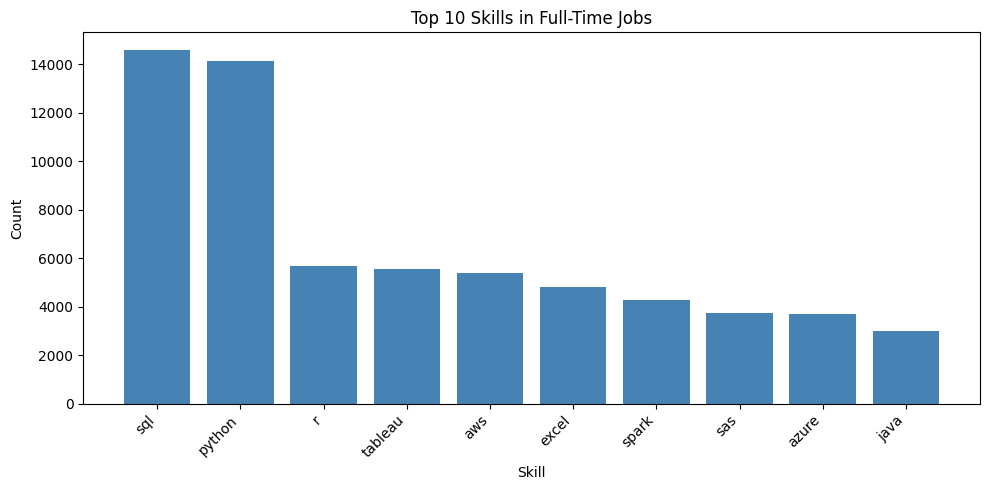

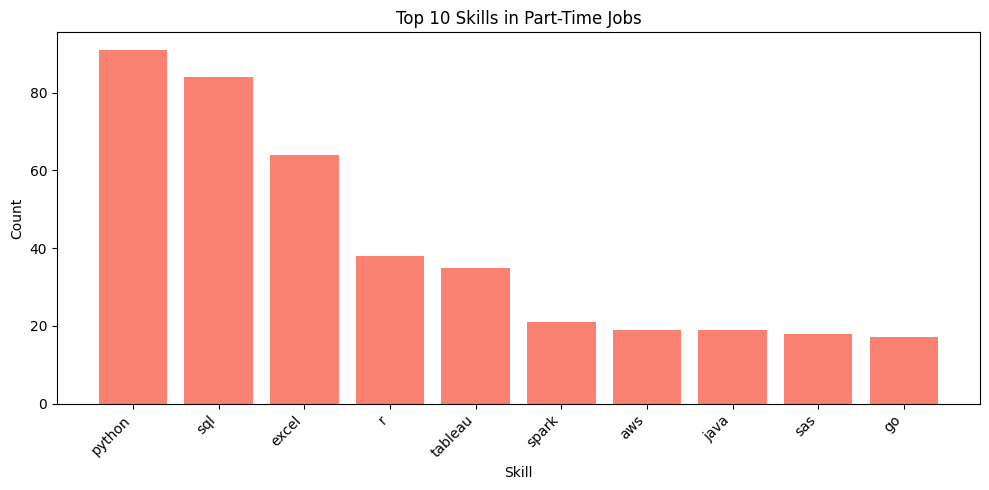

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

df = pd.read_csv("Job_Data.csv", encoding="latin1", sep=";")
df['job_skills'] = df['job_skills'].fillna("[]")
df['job_schedule_type'] = df['job_schedule_type'].astype(str).str.strip().str.lower()

def get_top_skills(subset_df, top_n=10):
    skill_lists = subset_df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
    all_skills = [s.strip().lower() for sublist in skill_lists for s in sublist]
    return Counter(all_skills).most_common(top_n)

full_time_df = df[df['job_schedule_type'] == 'full-time']
part_time_df = df[df['job_schedule_type'] == 'part-time']

ft_skills = pd.DataFrame(get_top_skills(full_time_df), columns=['Skill', 'Count']).set_index('Skill')
pt_skills = pd.DataFrame(get_top_skills(part_time_df), columns=['Skill', 'Count']).set_index('Skill')

plt.figure(figsize=(10, 5))
plt.bar(ft_skills.index, ft_skills['Count'], color='steelblue')
plt.title('Top 10 Skills in Full-Time Jobs')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(pt_skills.index, pt_skills['Count'], color='salmon')
plt.title('Top 10 Skills in Part-Time Jobs')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


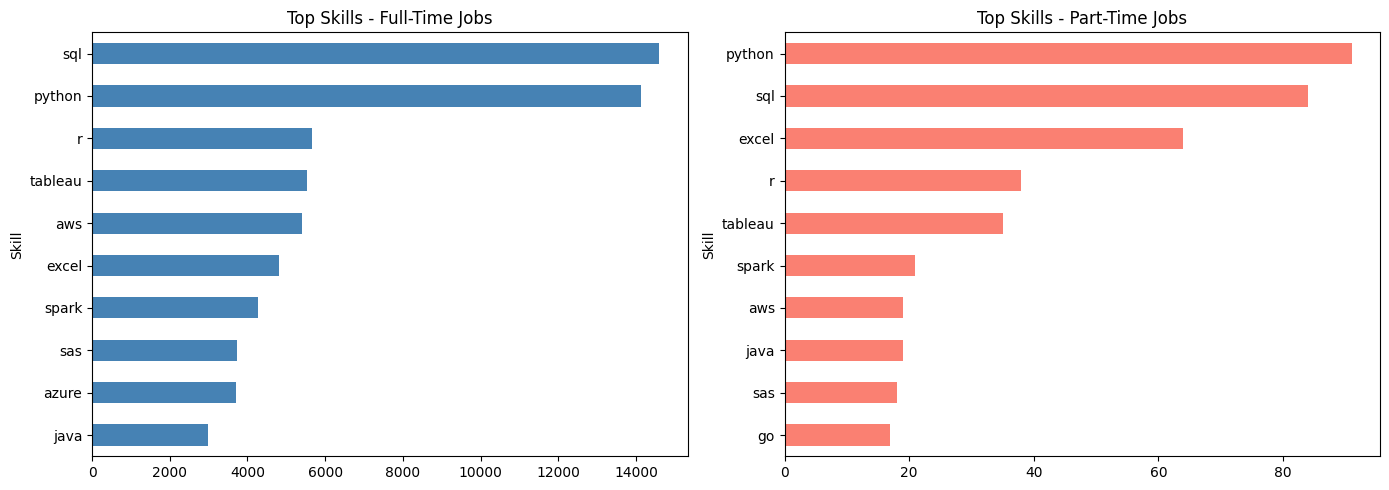

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ft_skills.plot(kind='barh', ax=axes[0], legend=False, color='steelblue')
axes[0].set_title('Top Skills - Full-Time Jobs')
axes[0].invert_yaxis()

pt_skills.plot(kind='barh', ax=axes[1], legend=False, color='salmon')
axes[1].set_title('Top Skills - Part-Time Jobs')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


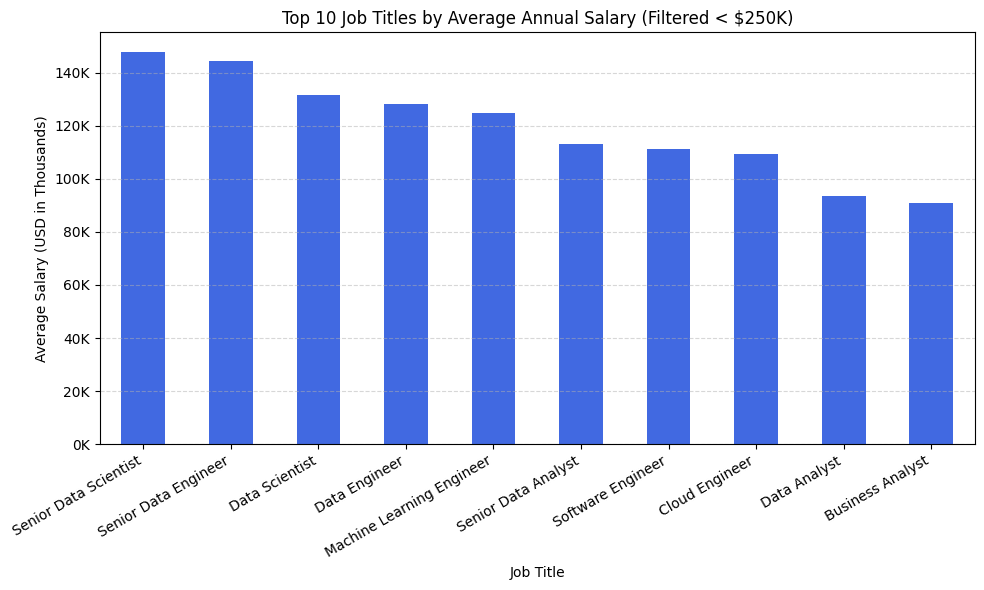

In [ ]:
"""### In-Depth Salary Analysis

**Task 7: Salary Trends**
- Which job titles have the highest average annual salaries?
- Which skills are associated with high salaries?
- How do `salary_hour_avg` and `salary_year_avg` differ?"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("Job_Data.csv", encoding="latin1", sep=";")
df.rename(columns={'ï»¿job_title_short': 'job_title_short'}, inplace=True)

df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')

filtered_df = df[
    (df['salary_year_avg'].notna()) &
    (df['salary_year_avg'] < 250_000) &
    (df['job_title_short'].notna())
]

top_titles = (
    filtered_df
    .groupby('job_title_short')['salary_year_avg']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(10, 6))
top_titles.plot(kind='bar', ax=ax, color='royalblue')

ax.set_title('Top 10 Job Titles by Average Annual Salary (Filtered < $250K)')
ax.set_xlabel('Job Title')
ax.set_ylabel('Average Salary (USD in Thousands)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


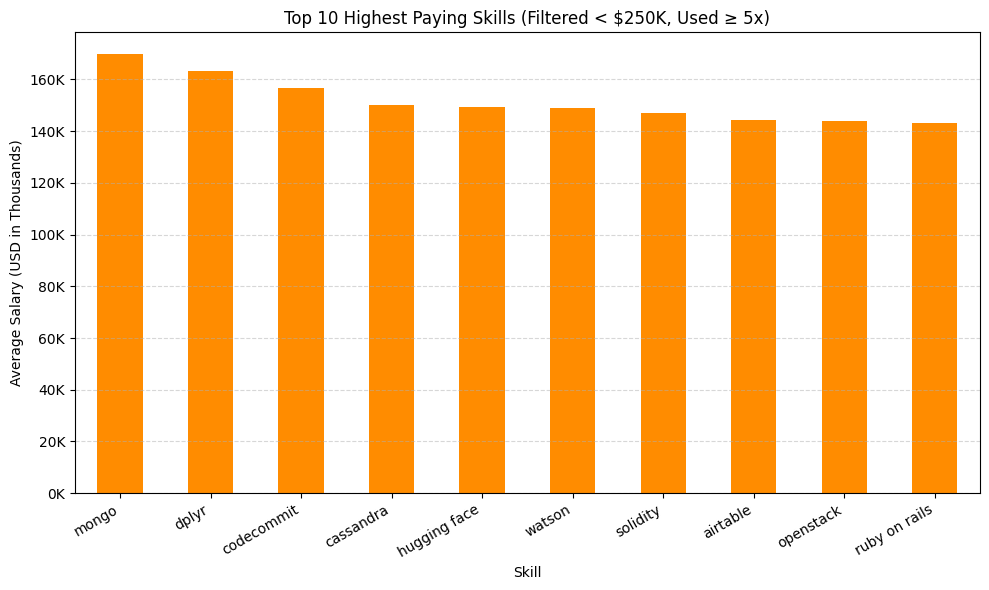

In [181]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ast

filtered_df = df[
    (df['salary_year_avg'].notna()) &
    (df['salary_year_avg'] < 250_000) &
    (df['job_skills'].notna())
]

skill_salary = defaultdict(list)

for _, row in filtered_df.iterrows():
    try:
        skills = ast.literal_eval(row['job_skills'])
        for skill in skills:
            skill_salary[skill.lower().strip()].append(row['salary_year_avg'])
    except:
        continue

avg_salary_by_skill = {
    skill: sum(salaries) / len(salaries)
    for skill, salaries in skill_salary.items()
    if len(salaries) >= 5
}

import pandas as pd
skill_df = pd.Series(avg_salary_by_skill).sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
skill_df.plot(kind='bar', color='darkorange', ax=ax)

ax.set_title('Top 10 Highest Paying Skills (Filtered < $250K, Used ≥ 5x)')
ax.set_xlabel('Skill')
ax.set_ylabel('Average Salary (USD in Thousands)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




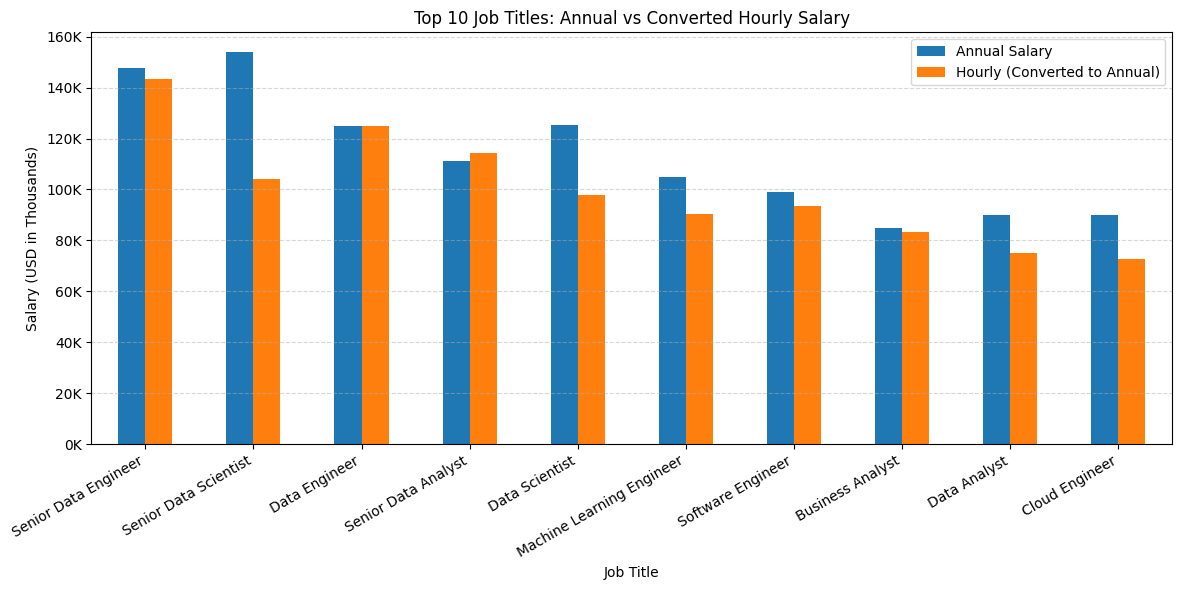

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("Job_Data.csv", encoding="latin1", sep=";")
df.rename(columns={'ï»¿job_title_short': 'job_title_short'}, inplace=True)

df['salary_hour_avg'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce')
df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')

hourly_jobs = df[
    (df['salary_hour_avg'].notna()) & (df['salary_hour_avg'] < 500)
].copy()
hourly_jobs['salary_hour_to_year'] = hourly_jobs['salary_hour_avg'] * 2080

salaried_jobs = df[
    (df['salary_year_avg'].notna()) & (df['salary_year_avg'] < 250_000)
]

hourly_medians = hourly_jobs.groupby('job_title_short')['salary_hour_to_year'].median()
salaried_medians = salaried_jobs.groupby('job_title_short')['salary_year_avg'].median()

combined = pd.merge(
    salaried_medians,
    hourly_medians,
    how='inner',
    left_index=True,
    right_index=True
).rename(columns={
    'salary_year_avg': 'Annual Salary',
    'salary_hour_to_year': 'Hourly (Converted to Annual)'
})

combined['average'] = combined.mean(axis=1)
top10 = combined.sort_values(by='average', ascending=False).head(10).drop(columns='average')

top10.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Job Titles: Annual vs Converted Hourly Salary')
plt.ylabel('Salary (USD in Thousands)')
plt.xlabel('Job Title')
plt.xticks(rotation=30, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




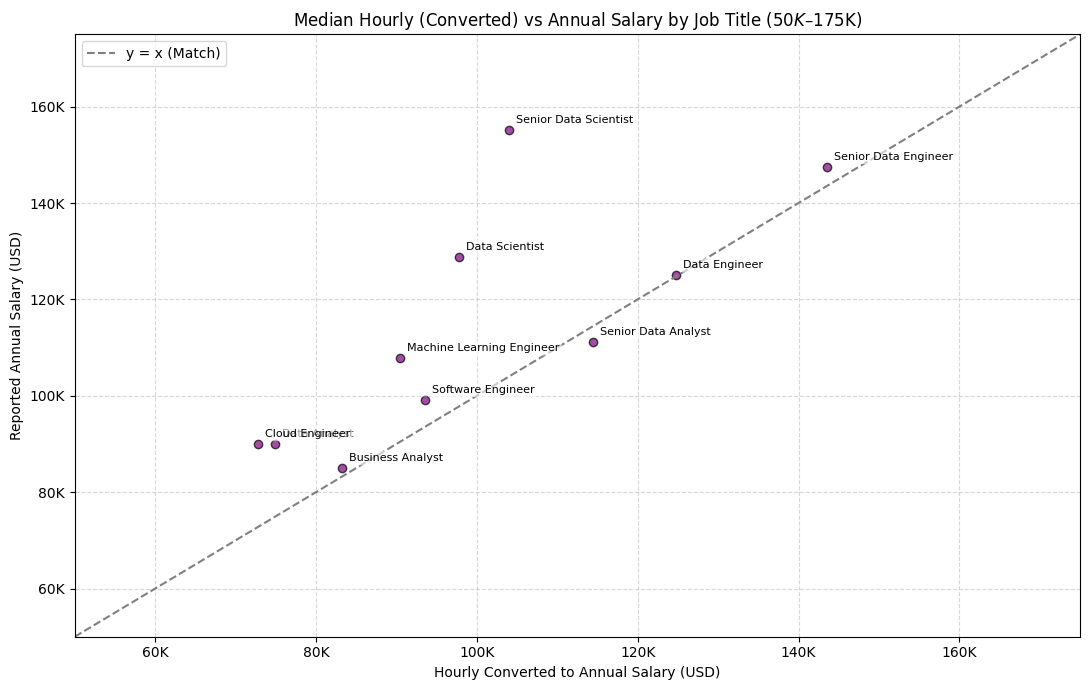


Top 10 Job Titles Where Converted Hourly > Reported Annual Salary:
                           salary_hour_to_year  salary_year_avg  salary_gap
job_title_short                                                            
Senior Data Analyst                   114400.0         111175.0      3225.0
Data Engineer                         124800.0         125000.0      -200.0
Business Analyst                       83200.0          85000.0     -1800.0
Senior Data Engineer                  143520.0         147500.0     -3980.0
Software Engineer                      93600.0          99150.0     -5550.0
Data Analyst                           74880.0          90000.0    -15120.0
Cloud Engineer                         72800.0          90000.0    -17200.0
Machine Learning Engineer              90480.0         107800.0    -17320.0
Data Scientist                         97760.0         128816.0    -31056.0
Senior Data Scientist                 104000.0         155250.0    -51250.0


In [183]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['salary_hour_to_year'] = df['salary_hour_avg'] * 2080

title_salary = df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_to_year']].median().dropna()

title_salary = title_salary[
    (title_salary['salary_year_avg'] < 250_000) &
    (title_salary['salary_hour_to_year'] < 250_000)
]

title_salary['salary_gap'] = title_salary['salary_hour_to_year'] - title_salary['salary_year_avg']

fig, ax = plt.subplots(figsize=(11, 7))
ax.scatter(
    title_salary['salary_hour_to_year'],
    title_salary['salary_year_avg'],
    alpha=0.7,
    color='purple',
    edgecolors='k'
)

ax.plot([50_000, 175_000], [50_000, 175_000], color='gray', linestyle='--', label='y = x (Match)')

ax.set_xlim(50_000, 175_000)
ax.set_ylim(50_000, 175_000)

top_gap_labels = title_salary.sort_values(by='salary_gap', ascending=False).head(10)
for job_title, row in top_gap_labels.iterrows():
    ax.annotate(
        job_title,
        (row['salary_hour_to_year'], row['salary_year_avg']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6, lw=0)
    )

ax.set_title('Median Hourly (Converted) vs Annual Salary by Job Title ($50K–$175K)')
ax.set_xlabel('Hourly Converted to Annual Salary (USD)')
ax.set_ylabel('Reported Annual Salary (USD)')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1000:.0f}K'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

top_gap_titles = top_gap_labels.copy()
top_gap_titles = top_gap_titles[['salary_hour_to_year', 'salary_year_avg', 'salary_gap']].round(2)

print("\nTop 10 Job Titles Where Converted Hourly > Reported Annual Salary:")
print(top_gap_titles)



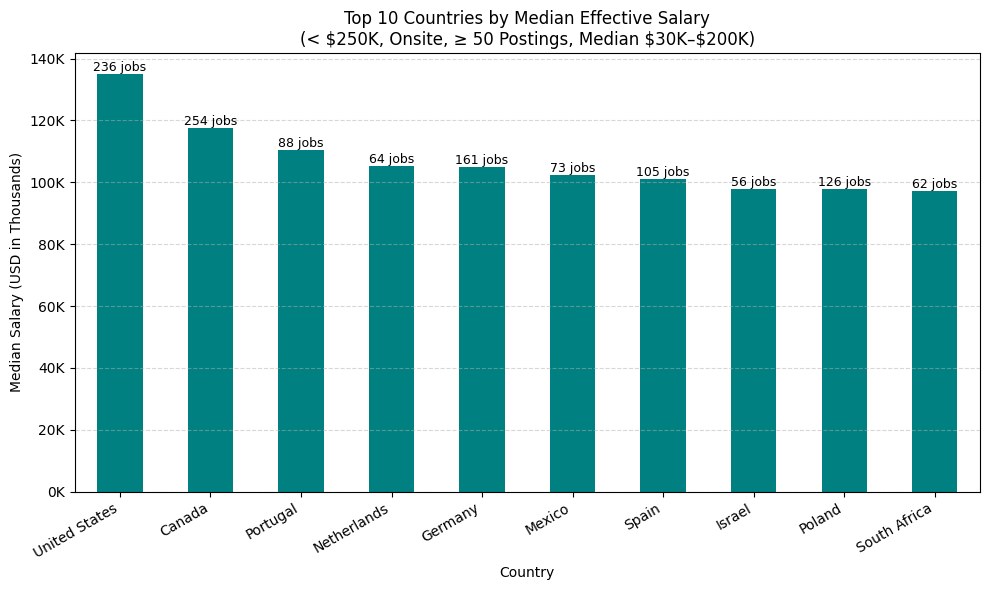

In [ ]:
"""**Task 8: Country/Location Comparison**
- Compare salary levels between the USA, Sudan, etc.
- Average salaries by state *(e.g., extracted from `job_location`)*"""

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


df = pd.read_csv("Job_Data.csv", encoding="utf-8-sig", sep=";")
df.rename(columns={'ï»¿job_title_short': 'job_title_short'}, inplace=True)

df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')
df['salary_hour_avg'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce')

df['salary_hour_to_year'] = df['salary_hour_avg'] * 2080

df['effective_salary'] = df['salary_year_avg'].fillna(df['salary_hour_to_year'])

country_df = df[
    (df['effective_salary'].notna()) &
    (df['effective_salary'] < 250_000) &
    (df['job_country'].notna()) &
    (df['job_location'].notna()) &
    (df['job_work_from_home'] == False)
].copy()

country_df = country_df[
    country_df.apply(lambda x: x['job_country'].lower() in str(x['job_location']).lower(), axis=1)
]

country_df = country_df.drop_duplicates(subset=['job_title_short', 'job_location', 'effective_salary'])

country_counts = country_df['job_country'].value_counts()
valid_countries = country_counts[country_counts >= 50].index
country_df = country_df[country_df['job_country'].isin(valid_countries)]

country_medians = country_df.groupby('job_country')['effective_salary'].median()

country_medians = country_medians[(country_medians >= 30_000) & (country_medians <= 200_000)]

job_counts = country_df['job_country'].value_counts()
top_10_countries = country_medians.sort_values(ascending=False).head(10)
top_counts = job_counts[top_10_countries.index]

fig, ax = plt.subplots(figsize=(10, 6))
bars = top_10_countries.plot(kind='bar', ax=ax, color='teal')

ax.set_title('Top 10 Countries by Median Effective Salary\n(< $250K, Onsite, ≥ 50 Postings, Median $30K–$200K)')
ax.set_xlabel('Country')
ax.set_ylabel('Median Salary (USD in Thousands)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for idx, val in enumerate(top_10_countries):
    ax.text(idx, val * 1.00, f'{top_counts.iloc[idx]} jobs', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()






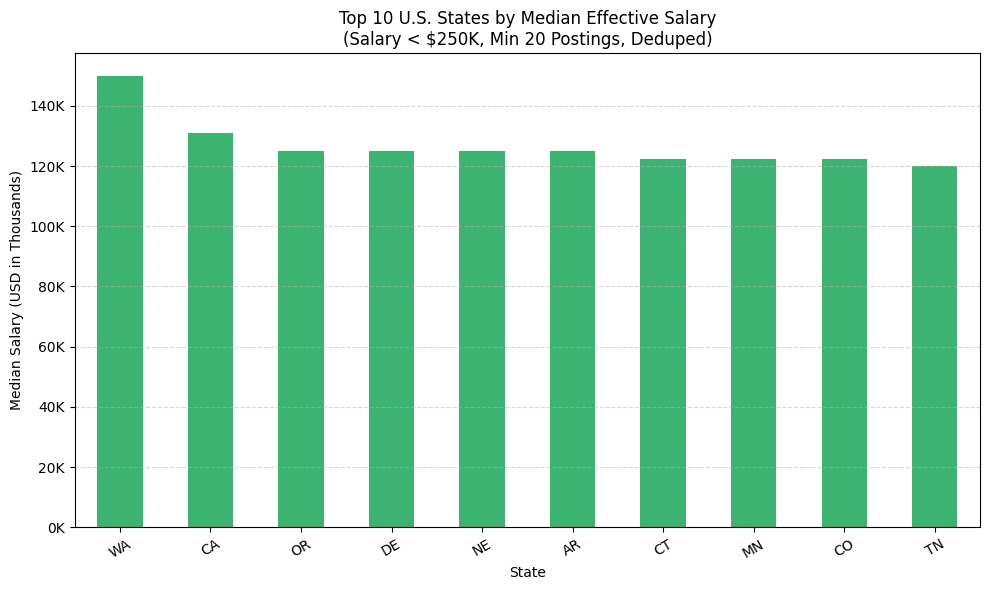

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("Job_Data.csv", encoding="latin1", sep=";")
df.columns = df.columns.str.strip().str.lower()  

df.columns = df.columns.str.strip().str.lower()
df.rename(columns={df.columns[0]: 'job_title_short'}, inplace=True)

df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')
df['salary_hour_avg'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce')
df['salary_hour_to_year'] = df['salary_hour_avg'] * 2080

df['effective_salary'] = df['salary_year_avg'].fillna(df['salary_hour_to_year'])

us_jobs = df[
    (df['job_country'] == 'United States') &
    (df['effective_salary'].notna()) &
    (df['effective_salary'] < 250_000)
].copy()

us_jobs['state'] = us_jobs['job_location'].apply(
    lambda x: x.split(',')[-1].strip().upper()
    if pd.notnull(x) and ',' in x else 'Unknown'
)

valid_states_set = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}
us_jobs = us_jobs[us_jobs['state'].isin(valid_states_set)]

country_df = country_df.drop_duplicates(subset=['job_title_short', 'job_location', 'effective_salary'])

state_counts = us_jobs['state'].value_counts()
valid_states = state_counts[state_counts >= 20].index
us_jobs = us_jobs[us_jobs['state'].isin(valid_states)]

state_salary = us_jobs.groupby('state')['effective_salary'].median().sort_values(ascending=False)
top_states = state_salary.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_states.plot(kind='bar', ax=ax, color='mediumseagreen')

ax.set_title('Top 10 U.S. States by Median Effective Salary\n(Salary < $250K, Min 20 Postings, Deduped)')
ax.set_xlabel('State')
ax.set_ylabel('Median Salary (USD in Thousands)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x / 1000:.0f}K'))

plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [186]:
"""### Exploratory Tasks

**Task 9: Text Parsing and Feature Engineering**
- Count occurrences of individual skills
- Cluster similar roles (e.g., all containing “Data Scientist”)
- Extract state from U.S. addresses"""

from collections import Counter
import ast

skill_lists = df['job_skills'].dropna().apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
flat_skills = [skill.strip().lower() for skills in skill_lists for skill in skills]

skill_counts = Counter(flat_skills)

skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
print(skill_df.head(10))




      Skill  Count
0       sql  18500
1    python  17689
4   tableau   7046
14        r   6929
2       aws   6844
40    excel   6264
10    spark   5294
41      sas   4806
26    azure   4760
8      java   3827


<Figure size 1000x600 with 0 Axes>

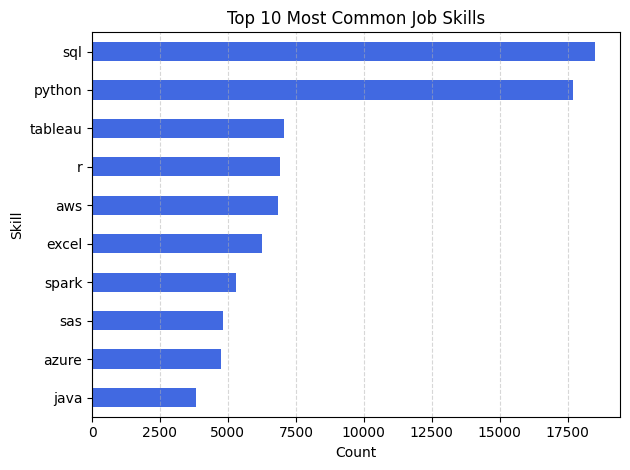

In [187]:
top_skills = skill_df.head(10).set_index('Skill')

plt.figure(figsize=(10, 6))
top_skills.plot(kind='barh', legend=False, color='royalblue')
plt.title('Top 10 Most Common Job Skills')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [188]:
def cluster_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title:
        return 'Machine Learning Engineer'
    elif 'software engineer' in title:
        return 'Software Engineer'
    elif 'business analyst' in title:
        return 'Business Analyst'
    elif 'cloud' in title:
        return 'Cloud Engineer'
    else:
        return 'Other'

df['role_cluster'] = df['job_title'].apply(cluster_job_title)

print(df['role_cluster'].value_counts())


role_cluster
Data Analyst                 9186
Data Scientist               8729
Data Engineer                8262
Other                        5564
Machine Learning Engineer     391
Business Analyst              262
Software Engineer             232
Cloud Engineer                 46
Name: count, dtype: int64


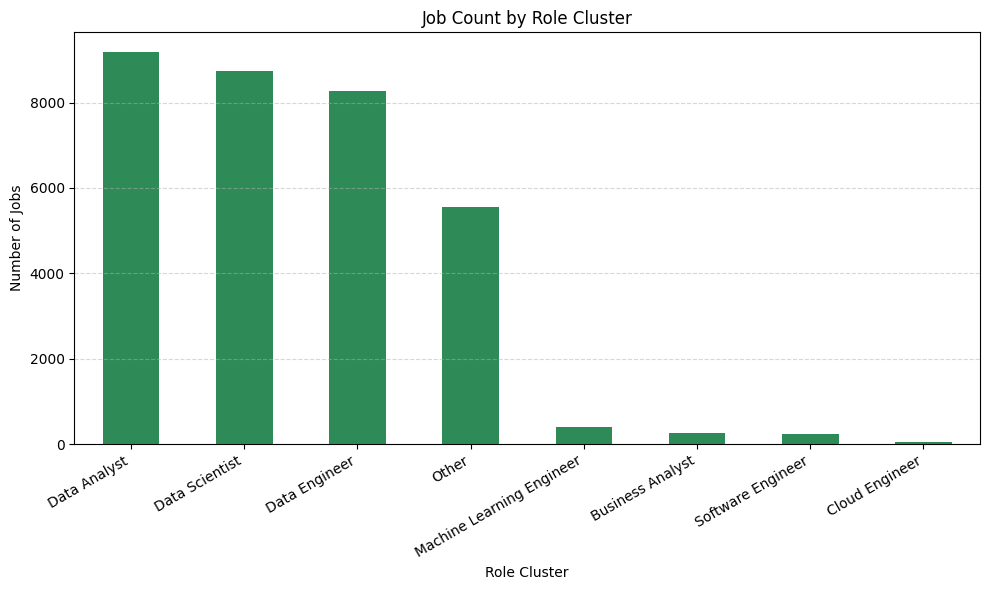

In [189]:
cluster_counts = df['role_cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='seagreen')
plt.title('Job Count by Role Cluster')
plt.ylabel('Number of Jobs')
plt.xlabel('Role Cluster')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [190]:
df['us_state'] = df.apply(
    lambda row: row['job_location'].split(',')[-1].strip().upper()
    if row['job_country'] == 'United States' and pd.notnull(row['job_location']) and ',' in row['job_location']
    else None,
    axis=1
)

us_states_list = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}
df['us_state'] = df['us_state'].where(df['us_state'].isin(us_states_list))

df.loc[df['job_location'].str.contains('Bennington, NE', na=False), 'us_state'] = 'NE'
df.loc[df['job_location'].str.contains('Tysons, VA', na=False), 'us_state'] = 'VA'

print(df[['job_location', 'us_state']].head(10))


        job_location us_state
0     Bennington, NE       NE
1           Mesa, AZ       AZ
2     Alexandria, VA       VA
3     Pittsburgh, PA       PA
4         Irving, TX       TX
5         Tysons, VA       VA
6           Anywhere      NaN
7         Coplay, PA       PA
8           Anywhere      NaN
9  Mountain View, CA       CA


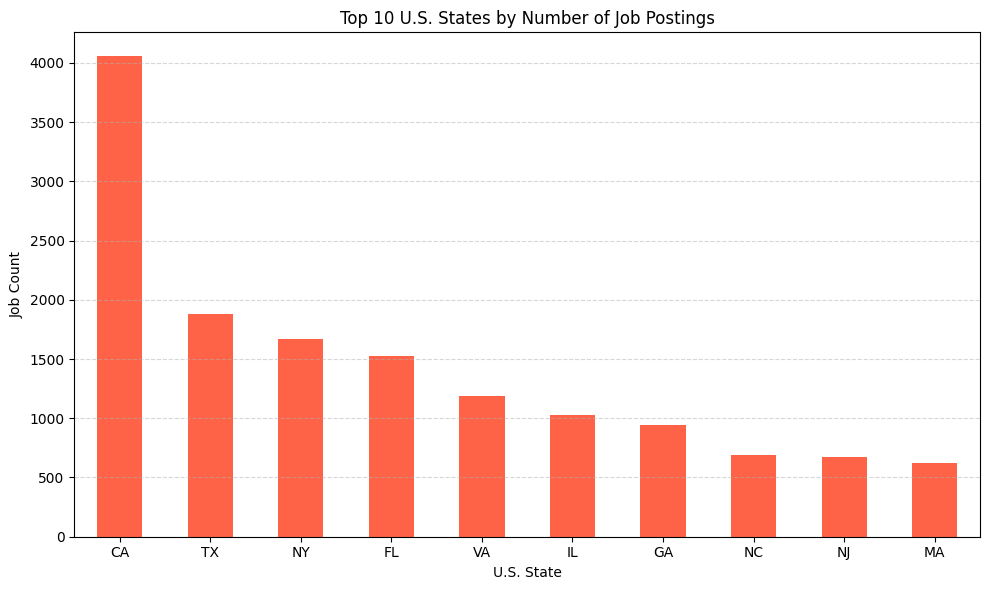

In [191]:
state_counts = df['us_state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='tomato')
plt.title('Top 10 U.S. States by Number of Job Postings')
plt.ylabel('Job Count')
plt.xlabel('U.S. State')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [192]:
import pandas as pd
import numpy as np


def extract_seniority(title):
    title = title.lower() if pd.notnull(title) else ""
    if 'senior' in title or 'sr' in title:
        return 'Senior'
    elif 'lead' in title or 'principal' in title:
        return 'Lead'
    elif 'junior' in title or 'jr' in title:
        return 'Junior'
    elif 'intern' in title:
        return 'Intern'
    elif 'entry' in title:
        return 'Entry-Level'
    else:
        return 'Mid-Level'

df['seniority'] = df['job_title'].apply(extract_seniority)

import ast
df['num_skills'] = df['job_skills'].apply(
    lambda x: len(ast.literal_eval(x)) if isinstance(x, str) and x.startswith('[') else 0
)

keywords = ['engineer', 'scientist', 'analyst', 'architect', 'developer', 'manager']
for kw in keywords:
    df[f'is_{kw}'] = df['job_title'].str.lower().str.contains(kw, na=False)


df['is_internal_posting'] = df['company_name'].str.lower().str.contains('jobs near me|internal', na=False)

print(df[['job_title', 'seniority', 'num_skills', 'is_engineer', 'is_scientist', 'is_internal_posting']].head())


                                           job_title  seniority  num_skills  \
0  Senior Data Scientist Data and Analytics Perfo...     Senior           7   
1                                 Data Engineer - MA  Mid-Level           7   
2  Supervisory Information Technology Specialist ...  Mid-Level           0   
3                Machine Learning Research Scientist  Mid-Level           2   
4                                Data Scientist, AWS  Mid-Level          19   

   is_engineer  is_scientist  is_internal_posting  
0        False          True                False  
1         True         False                False  
2        False         False                False  
3        False          True                False  
4        False          True                False  


In [193]:
"""**Task 10: Interactive Visualization (Optional)**
- Use Plotly or Dash for interactive charts *(if you want to go further)*"""

!pip install -U nbformat

import plotly.express as px



In [194]:
from collections import Counter
import pandas as pd
import plotly.express as px
import ast

df['job_skills_list'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else []
)

def normalize_skill(skill):
    skill = skill.strip().lower()
    replacements = {
        'excel spreadsheets': 'excel',
        'microsoft excel': 'excel',
        'excel ': 'excel',
        'python ': 'python',
        'r programming': 'r',
        'microsoft word': 'word',
        'tableau ': 'tableau',
        'google sheets': 'excel',
    }
    return replacements.get(skill, skill)

all_skills = [normalize_skill(skill) for sublist in df['job_skills_list'] for skill in sublist]

skill_counts = Counter(all_skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

top_skills = skill_df.head(10)
fig = px.bar(
    top_skills,
    x='Count',
    y='Skill',
    orientation='h',
    title='Top 10 Most Common Job Skills (Grouped & Normalized)',
    labels={'Count': 'Number of Jobs'},
    color='Count',
    color_continuous_scale='Reds'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

fig.write_html("top_10_skills_grouped.html")



In [195]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

df['salary_hour_to_year'] = df['salary_hour_avg'] * 2080

df = df[
    (df['salary_hour_to_year'].isna() | (df['salary_hour_to_year'] < 500_000)) &
    (df['salary_year_avg'].isna() | (df['salary_year_avg'] < 500_000))
]

title_salary = df.groupby('job_title_short')[['salary_hour_to_year', 'salary_year_avg']].median().reset_index()
title_salary['salary_gap'] = title_salary['salary_hour_to_year'].fillna(0) - title_salary['salary_year_avg'].fillna(0)

title_salary['hover_text'] = (
    "Title: " + title_salary['job_title_short'] + "<br>" +
    "Hourly → Annual: $" + title_salary['salary_hour_to_year'].round(0).astype(str) + "<br>" +
    "Reported Annual: $" + title_salary['salary_year_avg'].round(0).astype(str) + "<br>" +
    "Gap: $" + title_salary['salary_gap'].round(0).astype(str)
)

fig = px.scatter(
    title_salary,
    x='salary_hour_to_year',
    y='salary_year_avg',
    color='salary_gap',
    color_continuous_scale='RdBu',
    labels={
        'salary_hour_to_year': 'Hourly → Annual Salary (USD)',
        'salary_year_avg': 'Reported Annual Salary (USD)'
    },
    hover_name='job_title_short',
    hover_data={'salary_hour_to_year': True, 'salary_year_avg': True, 'salary_gap': True, 'job_title_short': False},
    title='Median Hourly (Converted) vs Annual Salary by Job Title',
    height=600
)

min_val = min(title_salary[['salary_hour_to_year', 'salary_year_avg']].min())
max_val = max(title_salary[['salary_hour_to_year', 'salary_year_avg']].max())
fig.add_shape(
    type='line',
    x0=min_val,
    y0=min_val,
    x1=max_val,
    y1=max_val,
    line=dict(color='gray', dash='dash')
)

fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

pio.write_html(fig, "hourly_vs_annual_hover_only.html", auto_open=True)


In [196]:
display_cols = ['job_title_short', 'salary_hour_to_year', 'salary_year_avg', 'salary_gap']
title_salary_sorted = title_salary.sort_values(by='salary_gap', ascending=False)

title_salary_sorted = title_salary_sorted[display_cols].round(2)

print("\nTop 10 Job Titles by Hourly - Annual Salary Gap:")
display(title_salary_sorted.head(10))



Top 10 Job Titles by Hourly - Annual Salary Gap:


,job_title_short,salary_hour_to_year,salary_year_avg,salary_gap
6,Senior Data Analyst,114400.0,111175.0,3225.0
3,Data Engineer,124800.0,125000.0,-200.0
0,Business Analyst,83200.0,85000.0,-1800.0
7,Senior Data Engineer,143520.0,147500.0,-3980.0
9,Software Engineer,93600.0,99150.0,-5550.0
2,Data Analyst,74880.0,90000.0,-15120.0
1,Cloud Engineer,72800.0,90000.0,-17200.0
5,Machine Learning Engineer,90480.0,107800.0,-17320.0
4,Data Scientist,97760.0,128816.0,-31056.0
8,Senior Data Scientist,104000.0,155000.0,-51000.0


In [197]:
import pandas as pd
import plotly.express as px

df['salary_hour_to_year'] = pd.to_numeric(df['salary_hour_avg'], errors='coerce') * 2080
df['salary_year_avg'] = pd.to_numeric(df['salary_year_avg'], errors='coerce')
df['effective_salary'] = df['salary_year_avg'].fillna(df['salary_hour_to_year'])

df['us_state'] = df['job_location'].apply(
    lambda x: x.split(',')[-1].strip().upper()
    if pd.notnull(x) and ',' in x else None
)

valid_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}
df['us_state'] = df['us_state'].where(df['us_state'].isin(valid_states))

df_valid = df[df['effective_salary'].notna() & (df['effective_salary'] < 500_000)]

state_stats = df_valid.groupby('us_state').agg(
    median_salary=('effective_salary', 'median'),
    job_count=('us_state', 'count')
).reset_index()

fig = px.choropleth(
    state_stats,
    locations='us_state',
    locationmode='USA-states',
    scope='usa',
    color='median_salary',
    hover_data={
        'median_salary': ':.0f',
        'job_count': True,
        'us_state': False  
    },
    color_continuous_scale='Viridis',
    labels={'median_salary': 'Median Salary ($)', 'job_count': 'Job Count'},
    title='Median Effective Salary by U.S. State (Hover for Job Count)'
)

fig.update_layout(
    geo=dict(bgcolor='white'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    title_x=0.5
)

fig.show()
fig.write_html("median_salary_by_state.html", auto_open=True)

